# <font color=darkred> IDSS31165</font>

<h1><center>Optimization in Generalized Linear Models </center></h1>

This practical work aims to implement two popular machine learning methods:

- **Exercice 1:** The goal of this exercice is to implement and understand the gradient descent method for the linear regression model.


- **Exercice 2:** The goal of this exercice is to understand the logistic regression model, implement the corresponding gradient descent solution and compare it to the glm (library) solution.



In [135]:
import pandas as pd 
data_regression =pd.read_csv("data/regression.csv",  sep=';') # load the data
#data_classif = pd.read_csv("classification.csv", sep=";")

In [136]:
#Sales dataset 
data_sales = pd.read_csv("data/Sales_Prediction_Dataset.csv", sep=",")
data_sales.head(5)

,MarketingBudget,ProductPrice,PointsOfSale,LaunchMonth,CompetitionLevel,Sales
0,20795,17,19,4,3,343
1,5860,44,2,8,2,169
2,43158,44,53,8,1,1305
3,49732,42,44,7,2,1066
4,16284,14,90,3,2,1304


In [137]:
#Revenue dataset
data_salary = pd.read_csv("data/Salary_Prediction_Dataset.csv", sep=",")
data_salary.head(5)


,YearsExperience,EducationLevel,Age,City,JobLevel,Salary
0,7,3,53,4,2,47921
1,20,4,45,1,2,80032
2,15,4,62,4,2,71657
3,11,2,33,1,1,42636
4,8,3,60,2,4,69982


# Exercice 1. Linear regression

Denote by D=$(x_i,y_i)_{1 \leq i \leq n}$ the set of $n$ samples (training sample). Let Y be the vector with coordinates $y_i$ and $X$ the matrix of size $n \times d$ with rows $x_i$.

1. Create two objects $(X,Y)$, knowing that the first column of the i-th row  corresponds to $y_i$. The other columns correspond to $x_i$.

In [138]:
#Initial Exercice 
X, Y = data_regression.iloc[:,1:], data_regression.iloc[:,0]

In [139]:
#Sales dataset
X, Y = data_sales.iloc[:, :-1], data_sales.iloc[:, -1]
#Salary dataset
X, Y = data_salary.iloc[:, :-1], data_salary.iloc[:, -1]

from sklearn.preprocessing import StandardScaler

# Apply scaling and convert back to DataFrame
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X = pd.DataFrame(X_scaled, columns=X.columns)

2. Show that the least squares solution is given by:

$$\widehat{\beta}=(X^{\top}X)^{-1}X^\top Y$$ 

- Add a column of 1 to take into account the: ''intercept'' $\beta_0$

In [140]:
import numpy as np
X['intercept'] = np.ones(len(X))

In [141]:
X.head(5)

,YearsExperience,EducationLevel,Age,City,JobLevel,intercept
0,-0.546551,0.449201,0.800087,1.225049,-0.500517,1.0
1,1.813970,1.365938,0.173182,-1.363082,-0.500517,1.0
2,0.906077,1.365938,1.505355,1.225049,-0.500517,1.0
3,0.179763,-0.467536,-0.767175,-1.363082,-1.410549,1.0
4,-0.364973,0.449201,1.348629,-0.500372,1.319546,1.0


- Compute $\widehat{\beta}$

In [142]:
beta_opt = np.linalg.inv(np.transpose(X).dot(X)).dot(np.transpose(X).dot(Y))

In [143]:
print(beta_opt)

[10015.56923644 11411.80624254 -1095.08492302   488.61618226
  9490.85016922 56251.36      ]


4.Write the gradient of the function $f$ : $\beta \in \mathbb{R} \mapsto \vert \vert Y − X\beta \vert \vert ^2$

In [144]:
def f_obj(beta):
    #obj = #TODO 
    return np.linalg.norm(Y - X.dot(beta)) ** 2 

def gradient_f(beta): 
    #grad = TODO
    grad = -2 * np.transpose(X).dot(Y-X.dot(beta)) 
    return grad

5.Implement the gradient descent method and plot the curve corresponding to $t \mapsto ∥\beta_t − \widehat{\beta}∥^2$, where $\beta_t$ represents the iteration number $t$ for gradient descent given $\beta_0$ and a stepsize.

- Definition  of the gradient descent function: 

In [145]:
def gradient_descent(n_iter, beta0, step): 
    beta_old = beta0
    objectives = []
    errors = [] 
    print( 'i ', ' | ', 'obj      ', ' | '  ,'err')
    print('\n')
    for i in range(1,n_iter):
        # insert the gradient descent formula 
        beta_new = beta_old - step * gradient_f(beta_old)
        obj = f_obj(beta_new)
        err = np.linalg.norm((beta_new-beta_opt))**2
        errors.append(err)
        objectives.append(obj)
        if (i % 10 == 0):
            print( i , '  |  ',  objectives[-1], '  |  ',  errors[-1] )
            print('\n')
        beta_old = beta_new
    return (beta_new, errors)

*N.B : We can think of a different stopping rule to replace the loop on n_iterations.*

- Compute the optimal least squares solution:

In [146]:
n_iter = 100
result = gradient_descent(n_iter, beta0= np.zeros(X.shape[1]), step=0.001)

i   |  obj        |  err


10   |   7787330597.336405   |   44853831.75421356


20   |   3536907132.2364745   |   704352.8063879809


30   |   3474405858.6356606   |   15349.382900029463


40   |   3473163533.9394603   |   457.11853885454053


50   |   3473129042.326444   |   16.21363823250027


60   |   3473127858.688031   |   0.6171427883993035


70   |   3473127814.1962557   |   0.024104452716064803


80   |   3473127812.4666533   |   0.0009508911882240593


90   |   3473127812.3985567   |   3.7676909115731084e-05




- Draw the curve of errors: 

Text(0, 0.5, 'error with respect to the optimum')

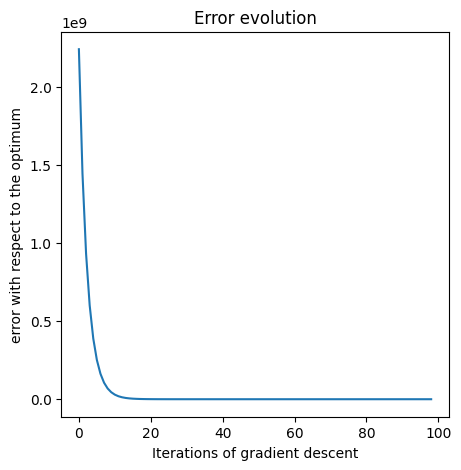

In [147]:
import matplotlib.pylab as plt 
%matplotlib inline
fig1 = plt.figure(figsize=(5,5))
plt.plot(result[1])
plt.title('Error evolution')
plt.xlabel('Iterations of gradient descent')
plt.ylabel('error with respect to the optimum')

YearsExperience: 10015.5687
EducationLevel: 11411.8057
Age: -1095.0856
City: 488.6155
JobLevel: 9490.8494
intercept: 56251.3600


C:\Users\rahimi\AppData\Local\Temp\ipykernel_2236\427342735.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Y_pred = X_feature * beta[0] + beta[-1]  # assuming last beta value is the intercept


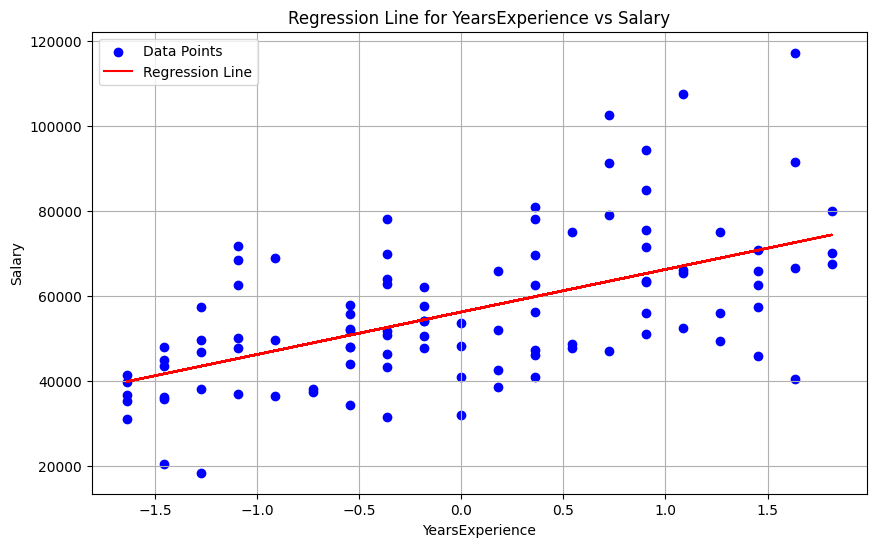

In [148]:
# Assume that X_scaled is already defined as part of your scaled dataset
feature_names = list(X.columns)

# Function to display coefficients
def display_coefficients(beta, feature_names):
    coef_dict = dict(zip(feature_names, beta))
    for feature, coef in coef_dict.items():
        print(f"{feature}: {coef:.4f}")

# Function to plot the regression line (useful if there's one feature to show in a 2D plot)
def plot_regression_line(X, Y, beta, feature_name='Feature', target_name='Target'):
    # For visualization, we assume we're focusing on one feature plus an intercept
    X_feature = X[feature_name]
    Y_pred = X_feature * beta[0] + beta[-1]  # assuming last beta value is the intercept
    
    plt.figure(figsize=(10, 6))
    plt.scatter(X_feature, Y, color="blue", label="Data Points")
    plt.plot(X_feature, Y_pred, color="red", label="Regression Line")
    plt.xlabel(feature_name)
    plt.ylabel(target_name)
    plt.legend()
    plt.title(f"Regression Line for {feature_name} vs {target_name}")
    plt.grid(True)
    plt.show()

# Show the final coefficients for each feature
display_coefficients(result[0], feature_names)

# Use the plotting function only if there's one feature to visualize the regression line
# plot_regression_line(X, Y, result[0], feature_name='MarketingBudget', target_name='Sales')
plot_regression_line(X, Y, result[0], feature_name='YearsExperience', target_name='Salary')


In [149]:
from sklearn.linear_model import LinearRegression

# Fit the Linear Regression model using scikit-learn
model = LinearRegression()
model.fit(X, Y)

# Display the coefficients and intercept
print("Coefficients:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef:.4f}")

print(f"Intercept: {model.intercept_:.4f}")

Coefficients:
YearsExperience: 10015.5692
EducationLevel: 11411.8062
Age: -1095.0849
City: 488.6162
JobLevel: 9490.8502
intercept: 0.0000
Intercept: 56251.3600


In [150]:
# PREDICTIONS FOR SALES 

# Load the testing dataset
predict_sales = pd.read_csv("data/Sales_Prediction_Dataset.csv", sep=",")
X_test = predict_sales.iloc[:, :-1]  # All features except the last column
Y_test = predict_sales.iloc[:, -1]   # The last column is the target

# Apply the previously fitted scaler to the test data (use transform, not fit_transform)
X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)  # Convert back to DataFrame for clarity

# Add intercept column (ones) to the test set
X_test_scaled['intercept'] = np.ones(len(X_test_scaled))

# Make predictions using the optimized coefficients from gradient descent
sales_predictions = X_test_scaled.dot(result[0])

# Display predictions
print("Predicted Sales:")
print(sales_predictions)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# R-squared
r2 = r2_score(Y_test, sales_predictions)
rmse = np.sqrt(mean_squared_error(Y_test, sales_predictions))
print(f"R-squared (R2): {r2:.4f}")
print(f"Root Mean Squared Error (RMSE):{rmse:.2f}")

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- CompetitionLevel
- LaunchMonth
- MarketingBudget
- PointsOfSale
- ProductPrice
Feature names seen at fit time, yet now missing:
- Age
- City
- EducationLevel
- JobLevel
- YearsExperience


In [153]:
# PREDICTIONS FOR SALARY

# Load the testing dataset
predict_salary = pd.read_csv("data/Salary_Prediction_Dataset.csv", sep=",")
X_test = predict_salary.iloc[:, :-1]  # All features except the last column
Y_test = predict_salary.iloc[:, -1]   # The last column is the target

# Apply the previously fitted scaler to the test data (use transform, not fit_transform)
X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)  # Convert back to DataFrame for clarity

# Add intercept column (ones) to the test set
X_test_scaled['intercept'] = np.ones(len(X_test_scaled))

# Make predictions using the optimized coefficients from gradient descent
salary_predictions = X_test_scaled.dot(result[0])

# Display predictions
print("Predicted Salaries:")
print(salary_predictions)

# R-squared
r2 = r2_score(Y_test, salary_predictions)
rmse = np.sqrt(mean_squared_error(Y_test, salary_predictions))
print(f"R-squared (R2): {r2:.4f}")
print(f"Root Mean Squared Error (RMSE):{rmse:.2f}")

Predicted Salaries:
0     50875.612188
1     84401.110424
2     75113.806699
3     39503.149780
4     68524.401252
          ...     
95    79425.603352
96    43935.445876
97    30226.456171
98    57732.993418
99    47869.177941
Length: 100, dtype: float64
R-squared (R2): 0.8908
Root Mean Squared Error (RMSE):5893.32


2. We recall that the logistic regression minimization problem is given by: 

$$ \min_{\beta} f(\beta) = \sum_{i=1}^{n}\left[y_i\log\left(1+ \exp^{-\langle x_i, \beta \rangle}\right) + (1-y_i)\log\left(1+\exp^{ \langle x_i, \beta \rangle }\right)\right]$$
where
$$ p_i = \frac{1}{1+ \exp^{-\langle x_i, \beta \rangle}} = \mathbb{P}(y_i = 1 | \langle x_i,\beta\rangle) $$ 

2.1. Define the objective function at point $\beta$ with respect to X,y:

2.2. Define the gradient of the objective function as a function of $\beta$